In [1]:
%matplotlib inline

import time
import datetime as dt
import os
import glob
import json

import itertools as it

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

os.getcwd()

'/home/edmz/Data Covid/Code'

In [2]:
from dicts_paths_v1 import *
from calc_functions_v1 import *
from graph_functions_v1 import *

https://www.data.gouv.fr/fr/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/

https://www.data.gouv.fr/fr/datasets/donnees-relatives-aux-resultats-des-tests-virologiques-covid-19/

https://www.data.gouv.fr/fr/datasets/donnees-relatives-aux-personnes-vaccinees-contre-la-covid-19-1/

In [3]:
print(today)
print(date_choice)
print(date)
print(date_text)

2021-04-06
2021-04-06
2021-04-06
06/04/2021


### File paths

In [4]:
print('SIDEP\n   Données d\'entrée :') 
print(path_test)
print(fname_temp_test)
print(fname_output_test)

print('Données hospitalières\n   Données d\'entrée :') 
print(path_hosp)
print(fname_temp_hosp)
print(fname_output_hosp)

print('VAC-SI\n   Données d\'entrée :') 
print(path_vac)
print(fname_temp_vac)
print(fname_output_vac)

SIDEP
   Données d'entrée :
['../Data/sp-pos-quot-dep-2021-04-06-19h11.csv']
./Temp/sp-pos-quot-dep-2021-04-06-19h11
../Output/sp-pos-quot-dep-2021-04-06-19h11
Données hospitalières
   Données d'entrée :
['../Data/donnees-hospitalieres-classe-age-covid19-2021-04-06-19h06.csv']
./Temp/donnees-hospitalieres-classe-age-covid19-2021-04-06-19h06
../Output/donnees-hospitalieres-classe-age-covid19-2021-04-06-19h06
VAC-SI
   Données d'entrée :
['../Data/vacsi-a-dep-2021-04-06-19h16.csv']
./Temp/vacsi-a-dep-2021-04-06-19h16
../Output/vacsi-a-dep-2021-04-06-19h16


### Dictionnaries

In [5]:
print('Dict. reg_name\n     "11" :', reg_name['11'])
print('Dict. reg2dep\n     "Corse" :', reg2dep['Corse'])
print('Dict. dep2reg\n     "75" :', dep2reg['75'])
print('Dict. dep_name\n     "67" :', dep_name['67'])
print('Dict. class_2_3C\n      29 : ', class_2_3C[29])
print('Dict reg_3C_pop\n     "Grand Est" :', reg_3C_pop['Grand Est'])
print('Dict reg_2lignes\n      "Auvergne-Rhône-Alpes" :', reg_2lignes["Auvergne-Rhône-Alpes"], sep = '\n')

Dict. reg_name
     "11" : Île-de-France
Dict. reg2dep
     "Corse" : ['2A', '2B']
Dict. dep2reg
     "75" : Île-de-France
Dict. dep_name
     "67" : Bas-Rhin
Dict. class_2_3C
      29 :  0-29
Dict reg_3C_pop
     "Grand Est" : {'0-29': 1874571, '30-59': 2124342, '60+': 1512834, 'whole': 5511747}
Dict reg_2lignes
      "Auvergne-Rhône-Alpes" :
Auvergne-
Rhône-Alpes


### Functions

In [6]:
help(groupby_sum)

Help on function groupby_sum in module calc_functions_v1:

groupby_sum(d, columns)
    d: dataframe
    columns: list of column names
    returns: dataframe is grouped according to columns fed in
            other columns are summed
            dataframe is then formatted into a dataframe



In [7]:
help(columns_first)

Help on function columns_first in module calc_functions_v1:

columns_first(d, columns)
    d: dataframe
    by: a list of column names
    returns: dataframe reordered



In [8]:
help(calc_hebdo)

Help on function calc_hebdo in module calc_functions_v1:

calc_hebdo(d, columns_to_group, columns_to_sum)
    d: a dataframe
    columns_to_group: list of columns from which groups will be formed
            for example ['entity', 'three_class'] -> will calculate hebdo sums for (regionA, class1), (regionA, class2), etc.
    columns_to_sum: list of columns which values will be summed on a week-wise base
            for example ['P', 'T']



# Traitement des données SIDEP

In [9]:
fname = path_test[0]
din = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'dep': str})
din.sample(3)

dep       jour   P    T  cl_age90      pop
104156  2B 2020-05-27   0   10        89   9974.0
264796  73 2021-02-11  18  263        49  57492.0
252028  70 2020-08-12   0   41        79  23536.0

In [10]:
d = din.copy()
d = d.rename(columns = {'dep': 'entity'})
d = columns_first(d, columns = ['entity', 'cl_age90', 'jour'])
d_dep = d
d_dep.sample(3)

entity  cl_age90       jour  P    T      pop
106718     2B        79 2021-01-15  0  146  19021.0
37757      11        59 2020-11-01  1   22  51248.0
309459     86        79 2020-08-17  0   53  38886.0

In [11]:
d = din.copy()
d['reg'] = d['dep'].map(lambda x: dep2reg[x])
d = d.drop(columns = ['dep'])
dg = groupby_sum(d, columns = ['reg', 'jour', 'cl_age90'])
dg = d.rename(columns = {'reg': 'entity'})
dg = columns_first(dg, columns = ['entity', 'cl_age90', 'jour'])
d_reg = dg
d_reg.sample(3)

entity  cl_age90       jour   P    T      pop
58191   Nouvelle-Aquitaine        19 2020-07-26   0    4  71812.0
188865           Grand Est        69 2020-12-16  12   94  24972.0
178393    Pays de la Loire        69 2021-01-11  21  448  96660.0

In [12]:
d = din.copy()
d = d.drop(columns = ['dep'])
dg = groupby_sum(d, columns = ['jour', 'cl_age90'])
dg['entity'] = 'France entière'
dg = columns_first(dg, columns = ['entity', 'cl_age90', 'jour'])
d_nat = dg
d_nat.sample(3)

entity  cl_age90       jour     P      T           pop
714   France entière        90 2020-07-16     6   1962  9.125806e+05
2259  France entière        39 2020-12-04  1773  31654  8.295372e+06
273   France entière        89 2020-06-06    23   1986  3.245281e+06

In [13]:
d = pd.merge(d_dep, d_reg, how = 'outer')
dout = pd.merge(d, d_nat, how = 'outer')
dout = columns_first(dout, columns = ['entity', 'cl_age90', 'jour'])
dout.head(3)

entity  cl_age90       jour  P   T      pop
0     01         9 2020-05-13  0  16  83001.0
1     01        19 2020-05-13  1  17  84665.0
2     01        29 2020-05-13  0  34  65496.0

In [14]:
dout.tail(3)

entity  cl_age90       jour     P      T           pop
749471  France entière        79 2021-04-03  1077  19766  5.695639e+06
749472  France entière        89 2021-04-03   578   9568  3.245281e+06
749473  France entière        90 2021-04-03   198   3310  9.125806e+05

In [15]:
fname = fname_temp_test + '-tot.csv'
dout.to_csv(fname, sep = ';', index = False)

### SIDEP - 3 classes d'âge

In [16]:
fname = fname_temp_test + '-tot.csv'
din = pd.read_csv(fname, 
                sep = ';', 
                parse_dates = ['jour'], 
                dtype = {'entity': str},
                skiprows = [])
din.tail(3)

entity  cl_age90       jour     P      T           pop
749471  France entière        79 2021-04-03  1077  19766  5.695639e+06
749472  France entière        89 2021-04-03   578   9568  3.245281e+06
749473  France entière        90 2021-04-03   198   3310  9.125806e+05

In [17]:
d = din.copy()
d['three_class'] = d['cl_age90'].map(lambda x: class_2_3C[x])
d = d.drop(columns = 'cl_age90')
dg = groupby_sum(d,['entity', 'jour', 'three_class'])
dg = columns_first(dg, columns = ['entity', 'three_class', 'jour'])
dout = dg
dout.tail(10)

entity three_class       jour      P       T         pop
155166  Île-de-France         60+ 2021-04-01   1558   15558   2517033.0
155167  Île-de-France       whole 2021-04-01  12727  143737  12278210.0
155168  Île-de-France        0-29 2021-04-02   4892   69614   4792882.0
155169  Île-de-France       30-59 2021-04-02   5977   67355   4968295.0
155170  Île-de-France         60+ 2021-04-02   1437   16302   2517033.0
155171  Île-de-France       whole 2021-04-02  12309  153355  12278210.0
155172  Île-de-France        0-29 2021-04-03   2796   40484   4792882.0
155173  Île-de-France       30-59 2021-04-03   3613   44061   4968295.0
155174  Île-de-France         60+ 2021-04-03    876    9624   2517033.0
155175  Île-de-France       whole 2021-04-03   7289   94220  12278210.0

In [18]:
fname = fname_temp_test + '-tot-3C.csv'
dout.to_csv(fname, sep = ';', index = False)

### SIDEP - calculs chiffres hebdomadaires

In [19]:
fname = fname_temp_test + '-tot-3C.csv'
din = pd.read_csv(fname, 
                sep = ';', 
                parse_dates = ['jour'], 
                dtype = {'entity': str},
                skiprows = [])
din.sample(3)

entity three_class       jour    P     T       pop
72284     55        0-29 2020-10-01    3   116   57443.0
30843     25       whole 2020-12-11  211  2217  539449.0
24017     19       30-59 2020-09-26    5    80   86672.0

In [20]:
d = din.copy()

dh = calc_hebdo(d, 
           columns_to_group = ['entity', 'three_class'], 
           columns_to_sum = ['P', 'T'])

0.38 s : (P hebdo, T hebdo) calculated for (01, 0-29)
0.76 s : (P hebdo, T hebdo) calculated for (01, 30-59)
1.14 s : (P hebdo, T hebdo) calculated for (01, 60+)
1.52 s : (P hebdo, T hebdo) calculated for (01, whole)
1.90 s : (P hebdo, T hebdo) calculated for (02, 0-29)
2.29 s : (P hebdo, T hebdo) calculated for (02, 30-59)
2.67 s : (P hebdo, T hebdo) calculated for (02, 60+)
3.09 s : (P hebdo, T hebdo) calculated for (02, whole)
3.47 s : (P hebdo, T hebdo) calculated for (03, 0-29)
3.86 s : (P hebdo, T hebdo) calculated for (03, 30-59)
4.23 s : (P hebdo, T hebdo) calculated for (03, 60+)
4.61 s : (P hebdo, T hebdo) calculated for (03, whole)
4.98 s : (P hebdo, T hebdo) calculated for (04, 0-29)
5.36 s : (P hebdo, T hebdo) calculated for (04, 30-59)
5.75 s : (P hebdo, T hebdo) calculated for (04, 60+)
6.13 s : (P hebdo, T hebdo) calculated for (04, whole)
6.51 s : (P hebdo, T hebdo) calculated for (05, 0-29)
6.89 s : (P hebdo, T hebdo) calculated for (05, 30-59)
7.29 s : (P hebdo, T he

58.18 s : (P hebdo, T hebdo) calculated for (37, 30-59)
58.56 s : (P hebdo, T hebdo) calculated for (37, 60+)
58.95 s : (P hebdo, T hebdo) calculated for (37, whole)
59.32 s : (P hebdo, T hebdo) calculated for (38, 0-29)
59.70 s : (P hebdo, T hebdo) calculated for (38, 30-59)
60.09 s : (P hebdo, T hebdo) calculated for (38, 60+)
60.48 s : (P hebdo, T hebdo) calculated for (38, whole)
60.86 s : (P hebdo, T hebdo) calculated for (39, 0-29)
61.26 s : (P hebdo, T hebdo) calculated for (39, 30-59)
61.65 s : (P hebdo, T hebdo) calculated for (39, 60+)
62.05 s : (P hebdo, T hebdo) calculated for (39, whole)
62.45 s : (P hebdo, T hebdo) calculated for (40, 0-29)
62.83 s : (P hebdo, T hebdo) calculated for (40, 30-59)
63.21 s : (P hebdo, T hebdo) calculated for (40, 60+)
63.59 s : (P hebdo, T hebdo) calculated for (40, whole)
63.98 s : (P hebdo, T hebdo) calculated for (41, 0-29)
64.37 s : (P hebdo, T hebdo) calculated for (41, 30-59)
64.75 s : (P hebdo, T hebdo) calculated for (41, 60+)
65.14 

115.08 s : (P hebdo, T hebdo) calculated for (74, 30-59)
115.45 s : (P hebdo, T hebdo) calculated for (74, 60+)
115.83 s : (P hebdo, T hebdo) calculated for (74, whole)
116.20 s : (P hebdo, T hebdo) calculated for (75, 0-29)
116.58 s : (P hebdo, T hebdo) calculated for (75, 30-59)
116.95 s : (P hebdo, T hebdo) calculated for (75, 60+)
117.33 s : (P hebdo, T hebdo) calculated for (75, whole)
117.70 s : (P hebdo, T hebdo) calculated for (76, 0-29)
118.07 s : (P hebdo, T hebdo) calculated for (76, 30-59)
118.44 s : (P hebdo, T hebdo) calculated for (76, 60+)
118.82 s : (P hebdo, T hebdo) calculated for (76, whole)
119.19 s : (P hebdo, T hebdo) calculated for (77, 0-29)
119.57 s : (P hebdo, T hebdo) calculated for (77, 30-59)
119.94 s : (P hebdo, T hebdo) calculated for (77, 60+)
120.31 s : (P hebdo, T hebdo) calculated for (77, whole)
120.68 s : (P hebdo, T hebdo) calculated for (78, 0-29)
121.09 s : (P hebdo, T hebdo) calculated for (78, 30-59)
121.47 s : (P hebdo, T hebdo) calculated fo

168.25 s : (P hebdo, T hebdo) calculated for (France entière, 60+)
168.63 s : (P hebdo, T hebdo) calculated for (France entière, whole)
169.01 s : (P hebdo, T hebdo) calculated for (Grand Est, 0-29)
169.40 s : (P hebdo, T hebdo) calculated for (Grand Est, 30-59)
169.77 s : (P hebdo, T hebdo) calculated for (Grand Est, 60+)
170.15 s : (P hebdo, T hebdo) calculated for (Grand Est, whole)
170.53 s : (P hebdo, T hebdo) calculated for (Hauts-de-France, 0-29)
170.91 s : (P hebdo, T hebdo) calculated for (Hauts-de-France, 30-59)
171.29 s : (P hebdo, T hebdo) calculated for (Hauts-de-France, 60+)
171.66 s : (P hebdo, T hebdo) calculated for (Hauts-de-France, whole)
172.04 s : (P hebdo, T hebdo) calculated for (Normandie, 0-29)
172.41 s : (P hebdo, T hebdo) calculated for (Normandie, 30-59)
172.79 s : (P hebdo, T hebdo) calculated for (Normandie, 60+)
173.20 s : (P hebdo, T hebdo) calculated for (Normandie, whole)
173.57 s : (P hebdo, T hebdo) calculated for (Nouvelle-Aquitaine, 0-29)
173.95 s 

In [21]:
dh.sample(3)

entity three_class       jour   P    T       pop  P hebdo  T hebdo
45945      35       30-59 2020-07-28  17  752  415285.0     63.0   3706.0
15         01       whole 2020-05-16   0  151  656955.0     23.0   1385.0
101026     77         60+ 2020-10-14  78  751  291762.0    476.0   4738.0

In [22]:
d = dh
d['incidence hebdo'] = d['P hebdo'] / d['pop'] * 100000
d['positivite hebdo'] = d['P hebdo'] / d['T hebdo'] * 100
d['taux de test hebdo'] = d['T hebdo'] / d['pop'] * 100000
d.sample(3)

entity three_class       jour   P    T       pop  P hebdo  T hebdo  \
38190     2B         60+ 2020-08-14   1   92   55395.0      2.0    409.0   
52884     40        0-29 2020-11-10  55  644  117790.0    338.0   3287.0   
37789     2A       30-59 2021-03-28   1   67   65969.0    123.0   4284.0   

       incidence hebdo  positivite hebdo  taux de test hebdo  
38190         3.610434          0.488998          738.333785  
52884       286.951354         10.282933         2790.559470  
37789       186.451212          2.871148         6493.959284

In [23]:
d.tail(3)

entity three_class       jour     P      T         pop  \
155173  Île-de-France       30-59 2021-04-03  3613  44061   4968295.0   
155174  Île-de-France         60+ 2021-04-03   876   9624   2517033.0   
155175  Île-de-France       whole 2021-04-03  7289  94220  12278210.0   

        P hebdo   T hebdo  incidence hebdo  positivite hebdo  \
155173  38839.0  363720.0       781.736994         10.678269   
155174   9926.0  101627.0       394.353193          9.767089   
155175  81094.0  853009.0       660.470867          9.506816   

        taux de test hebdo  
155173         7320.821328  
155174         4037.571220  
155175         6947.340044

In [24]:
fname = fname_temp_test + '-tot-3C-processed.csv'
d.to_csv(fname, sep = ';', index = False)

# Traitement des données hospitalières

In [25]:
fname = path_hosp[0]
din = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'dep': str})
din.sample(3)

reg  cl_age90       jour  hosp  rea  HospConv  SSR_USLD  autres    rad  \
71585   32        79 2021-03-14   715  152     397.0     164.0     2.0   5270   
43657   28        89 2020-10-24   222   10       NaN       NaN     NaN    534   
64504   76         0 2021-02-06  1843  279       NaN       NaN     NaN  12523   

         dc  
71585  1494  
43657   229  
64504  2782

In [26]:
d = din.copy()
d['entity'] = (d['reg']
               .map(lambda x: reg_name[str(x)] )
               .replace({
                   'Guadeloupe':'Outre-mer',
                   'Martinique':'Outre-mer',
                   'Guyane':'Outre-mer',
                   'La Réunion':'Outre-mer',
                   'Mayotte':'Outre-mer',
               })
              )
d = columns_first(d, columns = ['entity'])
d = d.drop(columns = ['reg'])
d.head(3)

entity  cl_age90       jour  hosp  rea  HospConv  SSR_USLD  autres  rad  \
0  Outre-mer         0 2020-03-18     0    0       NaN       NaN     NaN    0   
1  Outre-mer         9 2020-03-18     0    0       NaN       NaN     NaN    0   
2  Outre-mer        19 2020-03-18     0    0       NaN       NaN     NaN    0   

   dc  
0   0  
1   0  
2   0

In [27]:
d['three_class'] = d['cl_age90'].map(lambda x: class_2_3C[x])
d = d.drop(columns = 'cl_age90')
dg = groupby_sum(d,['entity', 'jour', 'three_class',])
# dg = (dg.reset_index()
#       .drop(columns = ['cl_age90'])
#             )
dg = columns_first(dg, ['entity', 'three_class', 'jour',])
d_reg = dg.copy()
d_reg.tail(3)

entity three_class       jour  hosp   rea  HospConv  SSR_USLD  \
21557  Île-de-France       30-59 2021-04-06  1923   575    1150.0     154.0   
21558  Île-de-France         60+ 2021-04-06  5676  1047    2907.0    1685.0   
21559  Île-de-France       whole 2021-04-06  7850  1660    4237.0    1859.0   

       autres    rad     dc  
21557    44.0  24268   1288  
21558    37.0  48024  15737  
21559    94.0  77511  17169

In [28]:
d = d_reg.copy()
dg = groupby_sum(d, columns = ['jour', 'three_class',])
dg['entity'] = 'France entière'
dg = columns_first(dg, columns = ['entity', 'three_class', 'jour',])
d_nat = dg
d_nat.sample(3)

entity three_class       jour   hosp   rea  HospConv  SSR_USLD  \
810   France entière         60+ 2020-10-06   5840  1066       0.0       0.0   
1247  France entière       whole 2021-01-23  25864  2886       0.0       0.0   
16    France entière        0-29 2020-03-22    160    23       0.0       0.0   

      autres     rad     dc  
810      0.0   63301  20032  
1247     0.0  216694  50875  
16       0.0     307      1

In [29]:
d_tot = pd.merge(d_reg, d_nat, how = 'outer')
d_tot = d_tot.drop(columns = ['HospConv', 'SSR_USLD', 'autres', 'rad'])
d_tot.sample(3)

entity three_class       jour  hosp  rea    dc
10431  Hauts-de-France       whole 2021-01-09  2252  239  4668
6729             Corse       30-59 2020-08-07     1    0     2
9122         Grand Est         60+ 2021-03-08  1953  238  7874

In [30]:
d = d_tot
d = calc_delta_hebdo(d, columns_to_group = ['entity', 'three_class'], columns_to_delta = ['dc'])

0.54 s : (dc hebdo) calculated for (Auvergne-Rhône-Alpes, 0-29)
1.05 s : (dc hebdo) calculated for (Auvergne-Rhône-Alpes, 30-59)
1.58 s : (dc hebdo) calculated for (Auvergne-Rhône-Alpes, 60+)
2.10 s : (dc hebdo) calculated for (Auvergne-Rhône-Alpes, whole)
2.62 s : (dc hebdo) calculated for (Bourgogne-Franche-Comté, 0-29)
3.15 s : (dc hebdo) calculated for (Bourgogne-Franche-Comté, 30-59)
3.67 s : (dc hebdo) calculated for (Bourgogne-Franche-Comté, 60+)
4.19 s : (dc hebdo) calculated for (Bourgogne-Franche-Comté, whole)
4.69 s : (dc hebdo) calculated for (Bretagne, 0-29)
5.21 s : (dc hebdo) calculated for (Bretagne, 30-59)
5.72 s : (dc hebdo) calculated for (Bretagne, 60+)
6.24 s : (dc hebdo) calculated for (Bretagne, whole)
6.76 s : (dc hebdo) calculated for (Centre-Val de Loire, 0-29)
7.28 s : (dc hebdo) calculated for (Centre-Val de Loire, 30-59)
7.80 s : (dc hebdo) calculated for (Centre-Val de Loire, 60+)
8.32 s : (dc hebdo) calculated for (Centre-Val de Loire, whole)
8.83 s : (dc

In [31]:
d['taux hosp'] = d.apply(lambda x: x['hosp'] / reg_3C_pop 
                                                    [ x['entity'] ]
                                                    [ x['three_class'] ] * 100000, 
                         axis = "columns")
d['taux rea'] = d.apply(lambda x: x['rea'] / reg_3C_pop
                                                    [ x['entity'] ]
                                                    [ x['three_class'] ] * 100000, 
                        axis = "columns")
d['taux décès'] = d.apply(lambda x: x['dc hebdo'] / reg_3C_pop
                                                    [ x['entity'] ]
                                                    [ x['three_class'] ] * 100000, 
                        axis = "columns")
d

entity three_class       jour   hosp   rea     dc  \
0      Auvergne-Rhône-Alpes        0-29 2020-03-18      4     0      0   
1      Auvergne-Rhône-Alpes       30-59 2020-03-18     33    11      1   
2      Auvergne-Rhône-Alpes         60+ 2020-03-18    127    24      6   
3      Auvergne-Rhône-Alpes       whole 2020-03-18    172    35      7   
4      Auvergne-Rhône-Alpes        0-29 2020-03-19      5     1      0   
...                     ...         ...        ...    ...   ...    ...   
23095        France entière       whole 2021-04-05  29907  5433  70771   
23096        France entière        0-29 2021-04-06    512    59     75   
23097        France entière       30-59 2021-04-06   5922  1621   3209   
23098        France entière         60+ 2021-04-06  23948  3893  67515   
23099        France entière       whole 2021-04-06  30639  5626  71180   

       dc hebdo   taux hosp   taux rea  taux décès  
0           0.0    0.141085   0.000000    0.000000  
1           0.0    1.069485   0.356495    0.000000  
2           0.0    6.014371   1.136574    0.000000  
3           0.0    2.141334   0.435737    0.000000  
4           0.0    0.176356   0.035271    0.000000  
...         ...         ...        ...         ...  
23095    1814.0   44.560832   8.095061    2.702824  
23096       3.0    2.171656   0.250249    0.012725  
23097     100.0   23.059911   6.312076    0.389394  
23098    1768.0  134.105495  21.800263    9.900556  
23099    1887.0   45.651497   8.382627    2.811592  

[23100 rows x 10 columns]

In [32]:
dout = d
fname = fname_temp_hosp + '-processed.csv'
dout.to_csv(fname, sep = ';', index = False)

# Données VAC-SI 

In [33]:
fname = path_vac[0]
din = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'dep': str})
din.sample(3)

dep  clage_vacsi       jour  n_dose1  n_dose2  n_cum_dose1  n_cum_dose2
111938  58            0 2021-02-03      277      327        10681          703
22843   23           79 2021-02-08       21       64         1288          254
30806   2B           79 2021-01-02        0        0            0            0

In [34]:
d = din.copy()
d = d[(d.dep != '00') & (d.dep != '750') & (d.dep != '970')] 
d = d.rename(columns = {'dep': 'entity'})
d = columns_first(d, columns = ['entity', 'clage_vacsi', 'jour'])
d_dep = d
d_dep.sample(3)

entity  clage_vacsi       jour  n_dose1  n_dose2  n_cum_dose1  \
70065     69           24 2021-03-02       99        2         1559   
97018     95           24 2021-01-14       11        0           25   
76391     75           49 2021-03-28      151        3        20986   

       n_cum_dose2  
70065          258  
97018            0  
76391         4645

In [35]:
d = din.copy()
d = d[(d.dep != '00') & (d.dep != '750') & (d.dep != '970')] #supprime lignes suspectes
d['reg'] = d['dep'].map(lambda x: dep2reg[x])
d = d.drop(columns = ['dep'])
dg = groupby_sum(d, columns = ['reg', 'jour', 'clage_vacsi'])
dg = d.rename(columns = {'reg': 'entity'})
dg = columns_first(dg, columns = ['entity', 'clage_vacsi', 'jour'])
d_reg = dg
d_reg.sample(3)

entity  clage_vacsi       jour  n_dose1  n_dose2  \
4931   Provence-Alpes-Côte d'Azur           80 2021-01-27      256        0   
52471                   Grand Est           59 2021-03-08       99        2   
97692               Île-de-France           69 2021-03-29      370       18   

       n_cum_dose1  n_cum_dose2  
4931          2306            0  
52471         5550         2882  
97692        10644         1480

In [36]:
d = din.copy()
d = d[(d.dep != '00') & (d.dep != '750') & (d.dep != '970')] 
d = d.drop(columns = ['dep'])
dg = groupby_sum(d, columns = ['jour', 'clage_vacsi'])
dg['entity'] = 'France entière'
dg = columns_first(dg, columns = ['entity', 'clage_vacsi', 'jour'])
d_nat = dg
d_nat.sample(3)

entity  clage_vacsi       jour  n_dose1  n_dose2  n_cum_dose1  \
676  France entière           59 2021-02-26    25647     5261       406980   
860  France entière           29 2021-03-15     1785      190        77888   
930  France entière           64 2021-03-21     4415       49       529504   

     n_cum_dose2  
676       265435  
860        20622  
930       142615

In [37]:
d = pd.merge(d_dep, d_reg, how = 'outer')
dout = pd.merge(d, d_nat, how = 'outer')
dout = columns_first(dout, columns = ['entity', 'clage_vacsi', 'jour'])
dout.head(3)

entity  clage_vacsi       jour  n_dose1  n_dose2  n_cum_dose1  n_cum_dose2
0     01           24 2020-12-27        0        0            0            0
1     01           24 2020-12-28        0        0            0            0
2     01           24 2020-12-29        0        0            0            0

In [38]:
d = dout.copy()
d['three_class'] = d['clage_vacsi'].map(lambda x: classvac_2_3C[x])
d = d.drop(columns = 'clage_vacsi')
dg = groupby_sum(d,['entity', 'jour', 'three_class'])
dg = columns_first(dg, columns = ['entity', 'three_class', 'jour'])
dout = dg
dout.tail(10)

entity three_class       jour  n_dose1  n_dose2  n_cum_dose1  \
47190  Île-de-France         60+ 2021-04-03    11612    18454      1059209   
47191  Île-de-France       whole 2021-04-03    17195    19627      1442346   
47192  Île-de-France        0-29 2021-04-04      223       25        39409   
47193  Île-de-France       30-59 2021-04-04     1931      365       345546   
47194  Île-de-France         60+ 2021-04-04     3432     6343      1062641   
47195  Île-de-France       whole 2021-04-04     5588     6734      1447934   
47196  Île-de-France        0-29 2021-04-05      236        8        39645   
47197  Île-de-France       30-59 2021-04-05     1577       76       347123   
47198  Île-de-France         60+ 2021-04-05     3634      836      1066275   
47199  Île-de-France       whole 2021-04-05     5449      920      1453383   

       n_cum_dose2  
47190       356473  
47191       439717  
47192         5310  
47193        78279  
47194       362816  
47195       446451  
47196         5318  
47197        78355  
47198       363652  
47199       447371

In [39]:
d = dout.copy()
d['taux dose 1'] = d.apply(lambda x: x['n_cum_dose1'] / reg_3C_pop 
                                                    [ x['entity'] ]
                                                    [ x['three_class'] ] * 100000, 
                         axis = "columns")
d['taux dose 2'] = d.apply(lambda x: x['n_cum_dose2'] / reg_3C_pop
                                                    [ x['entity'] ]
                                                    [ x['three_class'] ] * 100000, 
                        axis = "columns")
d

entity three_class       jour  n_dose1  n_dose2  n_cum_dose1  \
0                 01        0-29 2020-12-27        0        0            0   
1                 01       30-59 2020-12-27        0        0            0   
2                 01         60+ 2020-12-27        0        0            0   
3                 01       whole 2020-12-27        0        0            0   
4                 01        0-29 2020-12-28        0        0            0   
...              ...         ...        ...      ...      ...          ...   
47195  Île-de-France       whole 2021-04-04     5588     6734      1447934   
47196  Île-de-France        0-29 2021-04-05      236        8        39645   
47197  Île-de-France       30-59 2021-04-05     1577       76       347123   
47198  Île-de-France         60+ 2021-04-05     3634      836      1066275   
47199  Île-de-France       whole 2021-04-05     5449      920      1453383   

       n_cum_dose2   taux dose 1   taux dose 2  
0                0      0.000000      0.000000  
1                0      0.000000      0.000000  
2                0      0.000000      0.000000  
3                0      0.000000      0.000000  
4                0      0.000000      0.000000  
...            ...           ...           ...  
47195       446451  11792.712456   3636.124484  
47196         5318    827.164115    110.956205  
47197        78355   6986.763065   1577.100394  
47198       363652  42362.376655  14447.645303  
47199       447371  11837.091889   3643.617433  

[47200 rows x 9 columns]

In [40]:
dout = d.copy()
fname = fname_temp_vac + '-tot-3C.csv'
dout.to_csv(fname, sep = ';', index = False)

# Fusion SIDEP et données hospitalières

In [41]:
fname = fname_temp_test + '-tot-3C-processed.csv'
d = pd.read_csv(fname, sep = ';', 
                parse_dates = ['jour'],
                dtype = {'entity': str},
               )
d.sample(3)

entity three_class       jour    P     T       pop  P hebdo  T hebdo  \
27533     23       30-59 2020-06-19    0    10   41113.0      0.0     93.0   
59946     45         60+ 2021-03-25   53  1091  180580.0    306.0   5563.0   
88064     67        0-29 2020-11-03  373  3043  399593.0   2348.0  18811.0   

       incidence hebdo  positivite hebdo  taux de test hebdo  
27533         0.000000          0.000000          226.205823  
59946       169.453982          5.500629         3080.629084  
88064       587.597881         12.482058         4707.539922

In [42]:
len(d)

155176

In [43]:
fname = fname_temp_hosp + '-processed.csv'
d2 = pd.read_csv(fname, sep = ';', parse_dates = ['jour'])
d2.sample(3)

entity three_class       jour  hosp  rea    dc  dc hebdo  \
9773        Hauts-de-France       30-59 2020-07-29    64    6    98       3.0   
1182   Auvergne-Rhône-Alpes         60+ 2021-01-07  3607  297  6760     289.0   
14210             Occitanie         60+ 2020-06-13   114   15   484       4.0   

        taux hosp   taux rea  taux décès  
9773     2.813005   0.263719    0.131860  
1182   170.817609  14.065104   13.686246  
14210    6.523359   0.858337    0.228890

In [44]:
len(d2)

23100

In [45]:
d = pd.merge(d2, d, how = 'outer')
d.sample(10)

entity three_class       jour  hosp  rea  dc  dc hebdo  taux hosp  \
99573      58       30-59 2020-12-09   NaN  NaN NaN       NaN        NaN   
104438     62         60+ 2020-09-12   NaN  NaN NaN       NaN        NaN   
32266      08         60+ 2020-05-22   NaN  NaN NaN       NaN        NaN   
127119     79       whole 2021-01-18   NaN  NaN NaN       NaN        NaN   
132099     83       whole 2020-11-20   NaN  NaN NaN       NaN        NaN   
147470     95         60+ 2020-09-12   NaN  NaN NaN       NaN        NaN   
133575     84       whole 2021-01-02   NaN  NaN NaN       NaN        NaN   
124107     77       whole 2020-10-09   NaN  NaN NaN       NaN        NaN   
154269    975       30-59 2020-11-21   NaN  NaN NaN       NaN        NaN   
54244      25        0-29 2021-02-25   NaN  NaN NaN       NaN        NaN   

        taux rea  taux décès      P       T           pop  P hebdo  T hebdo  \
99573        NaN         NaN   15.0   291.0  6.942100e+04    120.0   1639.0   
104438       NaN         NaN   18.0   413.0  3.750750e+05    158.0   5427.0   
32266        NaN         NaN    0.0    27.0  7.886500e+04      6.0    175.0   
127119       NaN         NaN  251.0  3042.0  3.726270e+05   1079.0  14347.0   
132099       NaN         NaN  240.0  4764.0  1.073836e+06   1711.0  27541.0   
147470       NaN         NaN    9.0   199.0  2.412580e+05    173.0   3809.0   
133575       NaN         NaN  146.0  1694.0  5.609970e+05   1012.0  15680.0   
124107       NaN         NaN  649.0  4209.0  1.423607e+06   2977.0  21793.0   
154269       NaN         NaN    0.0     0.0  2.759957e+03      0.0     12.0   
54244        NaN         NaN   61.0   854.0  1.958330e+05    360.0   4135.0   

        incidence hebdo  positivite hebdo  taux de test hebdo  
99573        172.858357          7.321538         2360.957059  
104438        42.124908          2.911369         1446.910618  
32266          7.607938          3.428571          221.898180  
127119       289.565705          7.520736         3850.230928  
132099       159.335317          6.212556         2564.730555  
147470        71.707467          4.541875         1578.807749  
133575       180.393122          6.454082         2795.023859  
124107       209.116701         13.660350         1530.829787  
154269         0.000000          0.000000          434.789332  
54244        183.830100          8.706167         2111.492956

In [46]:
len(d)

158716

In [47]:
d.tail()

entity three_class       jour  hosp  rea  dc  dc hebdo  taux hosp  \
158711    978       whole 2021-04-02   NaN  NaN NaN       NaN        NaN   
158712    978        0-29 2021-04-03   NaN  NaN NaN       NaN        NaN   
158713    978       30-59 2021-04-03   NaN  NaN NaN       NaN        NaN   
158714    978         60+ 2021-04-03   NaN  NaN NaN       NaN        NaN   
158715    978       whole 2021-04-03   NaN  NaN NaN       NaN        NaN   

        taux rea  taux décès    P      T           pop  P hebdo  T hebdo  \
158711       NaN         NaN  4.0  128.0  35334.000000     19.0    992.0   
158712       NaN         NaN  0.0   23.0  15451.470743     10.0    217.0   
158713       NaN         NaN  1.0   65.0  15252.902558      8.0    594.0   
158714       NaN         NaN  0.0   14.0   4629.626699      0.0    168.0   
158715       NaN         NaN  1.0  102.0  35334.000000     18.0    979.0   

        incidence hebdo  positivite hebdo  taux de test hebdo  
158711        53.772570          1.915323         2807.494198  
158712        64.718758          4.608295         1404.397055  
158713        52.449034          1.346801         3894.340751  
158714         0.000000          0.000000         3628.802297  
158715        50.942435          1.838611         2770.702440

In [48]:
dout = d
fname = path_synth
dout.to_csv(fname, sep = ';', index = False)

# Graphes

In [3]:
fname = path_synth
d = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'entity': str})
d.sample(3)

entity three_class       jour  hosp  rea  dc  dc hebdo  taux hosp  \
96747     56       whole 2020-10-15   NaN  NaN NaN       NaN        NaN   
85196     47        0-29 2020-12-01   NaN  NaN NaN       NaN        NaN   
88924     50        0-29 2020-10-16   NaN  NaN NaN       NaN        NaN   

       taux rea  taux décès      P       T       pop  P hebdo  T hebdo  \
96747       NaN         NaN  110.0  1874.0  755566.0    552.0   9636.0   
85196       NaN         NaN   17.0   249.0   98425.0    100.0   1492.0   
88924       NaN         NaN   25.0   573.0  149117.0    107.0   2368.0   

       incidence hebdo  positivite hebdo  taux de test hebdo  
96747        73.057814          5.728518         1275.335312  
85196       101.600203          6.702413         1515.875032  
88924        71.755735          4.518581         1588.014780

In [4]:
entities = d['entity'].unique()
three_class = d['three_class'].unique()
regions = entities[:14]
last_week = d.jour >= np.datetime64(dt.datetime.fromisoformat(date) - dt.timedelta(weeks = 1))
regions_ordered = (d[(last_week) 
                    & (d.entity.isin(regions))
                    & (d.three_class == '60+')]
                   .groupby('entity')['taux hosp']
                   .mean()
                   .sort_values(ascending = False)
                   .index
                   .tolist())
regions_ordered

['Île-de-France',
 'Hauts-de-France',
 "Provence-Alpes-Côte d'Azur",
 'Grand Est',
 'Auvergne-Rhône-Alpes',
 'Normandie',
 'Bourgogne-Franche-Comté',
 'Centre-Val de Loire',
 'Corse',
 'Occitanie',
 'Pays de la Loire',
 'Bretagne',
 'Nouvelle-Aquitaine',
 'Outre-mer']

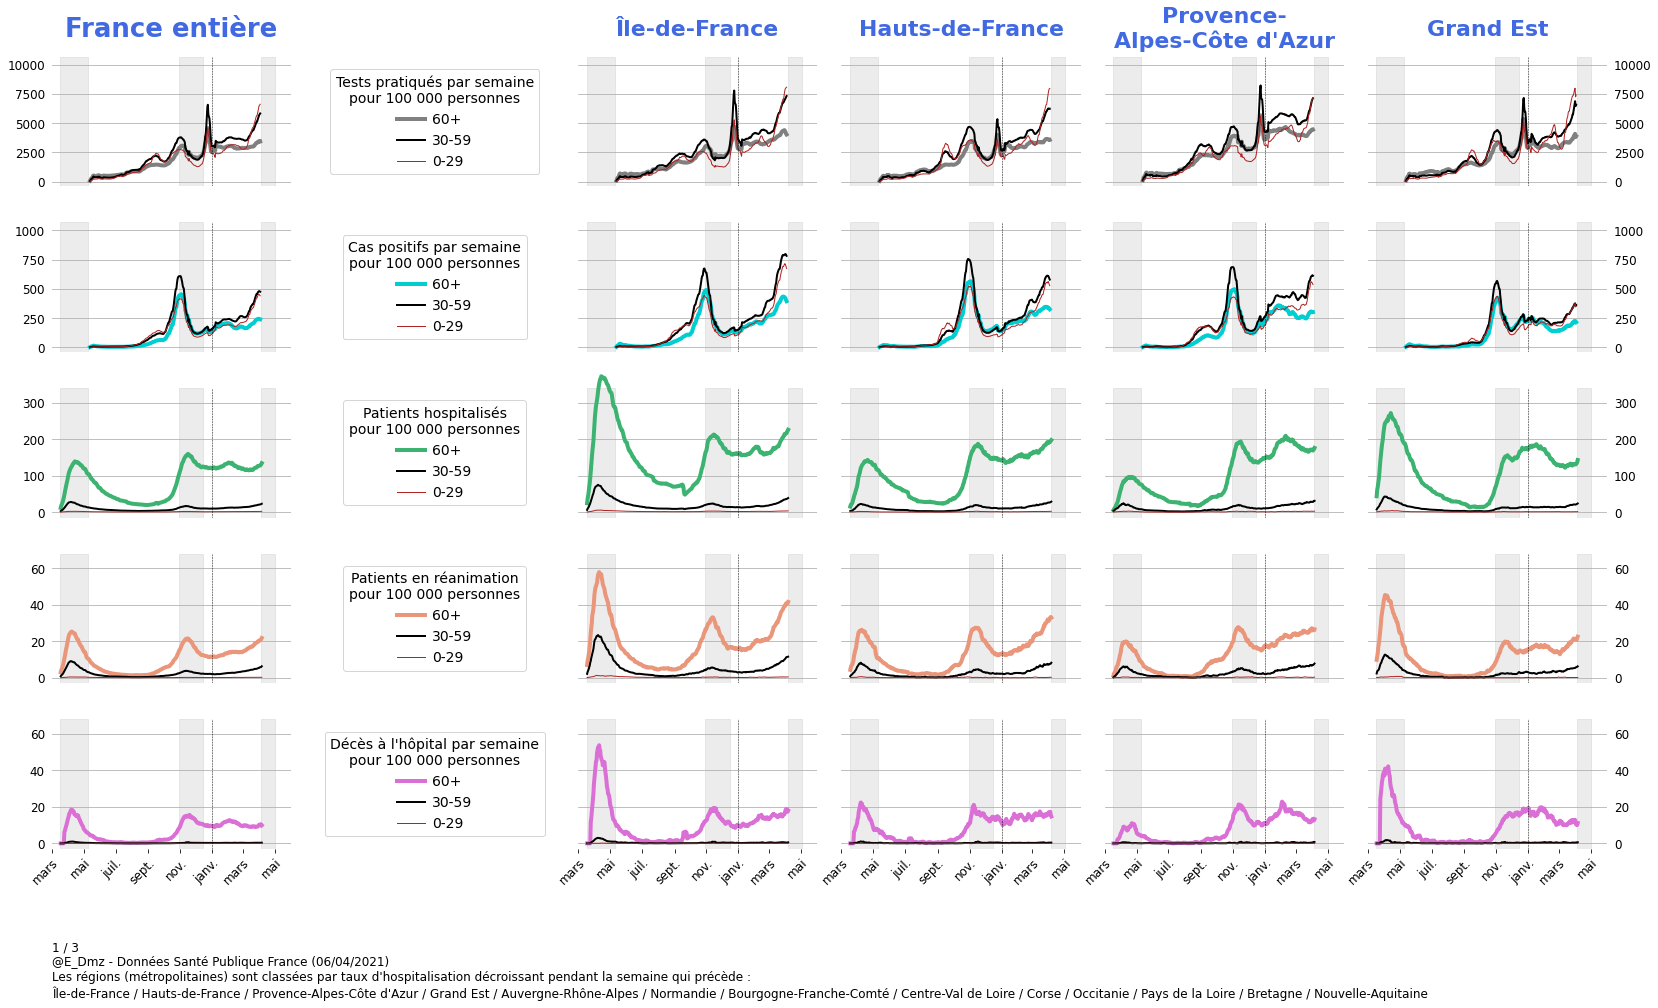

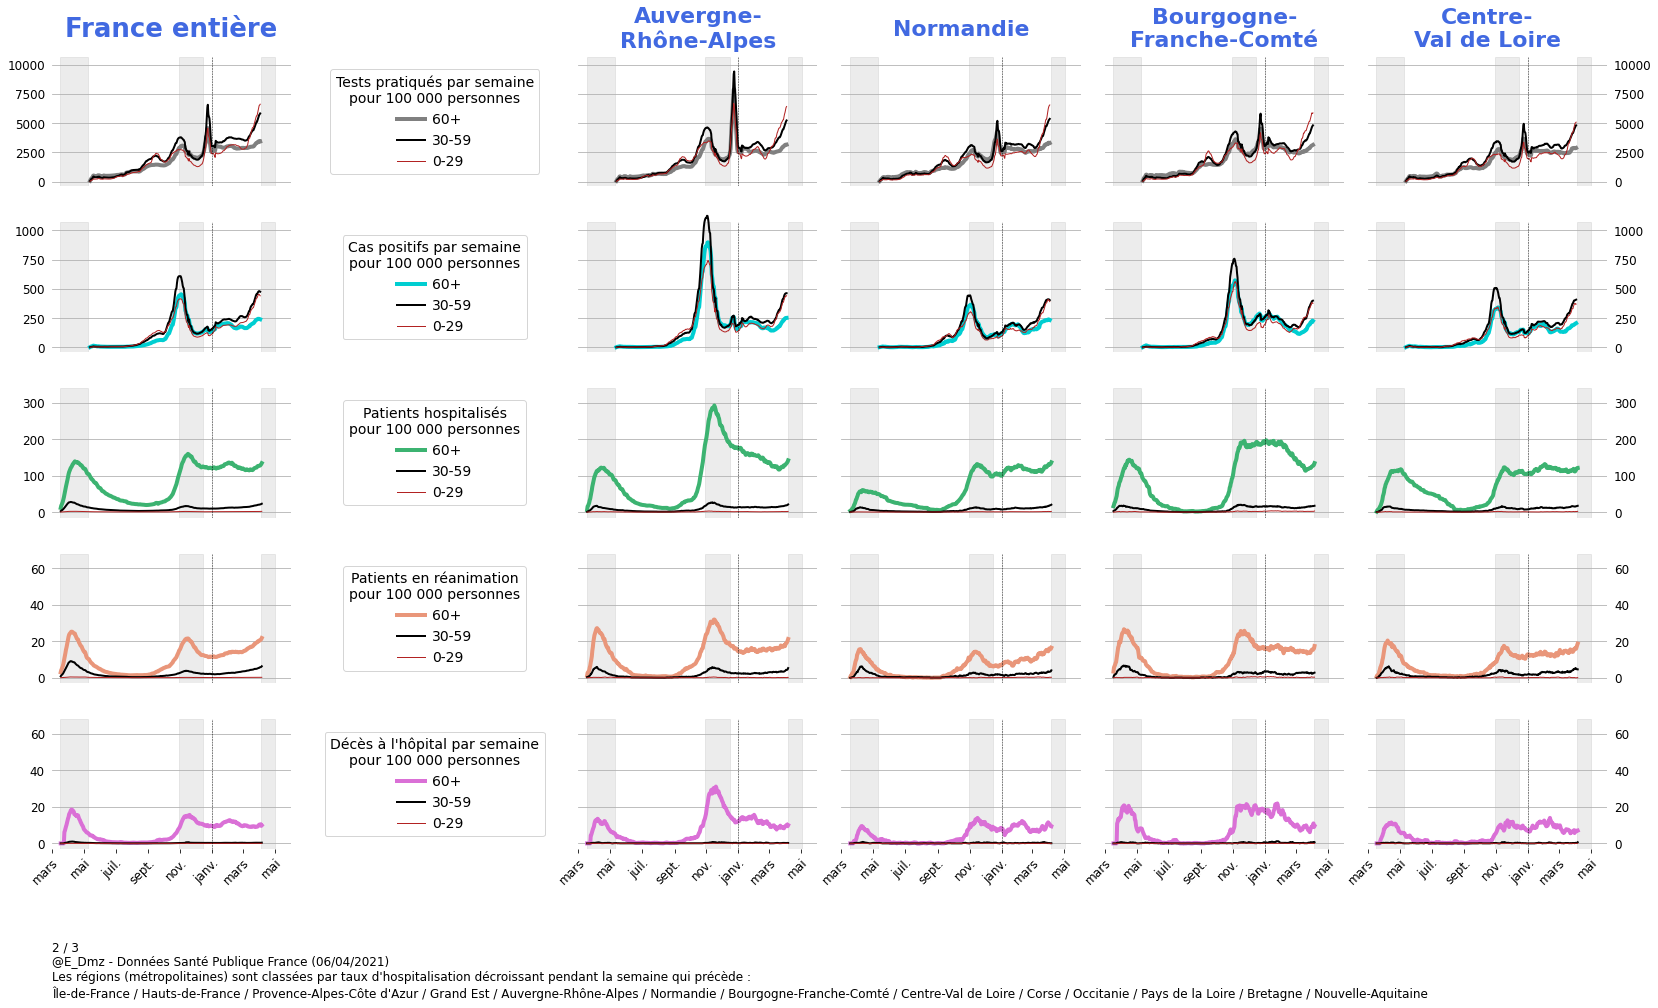

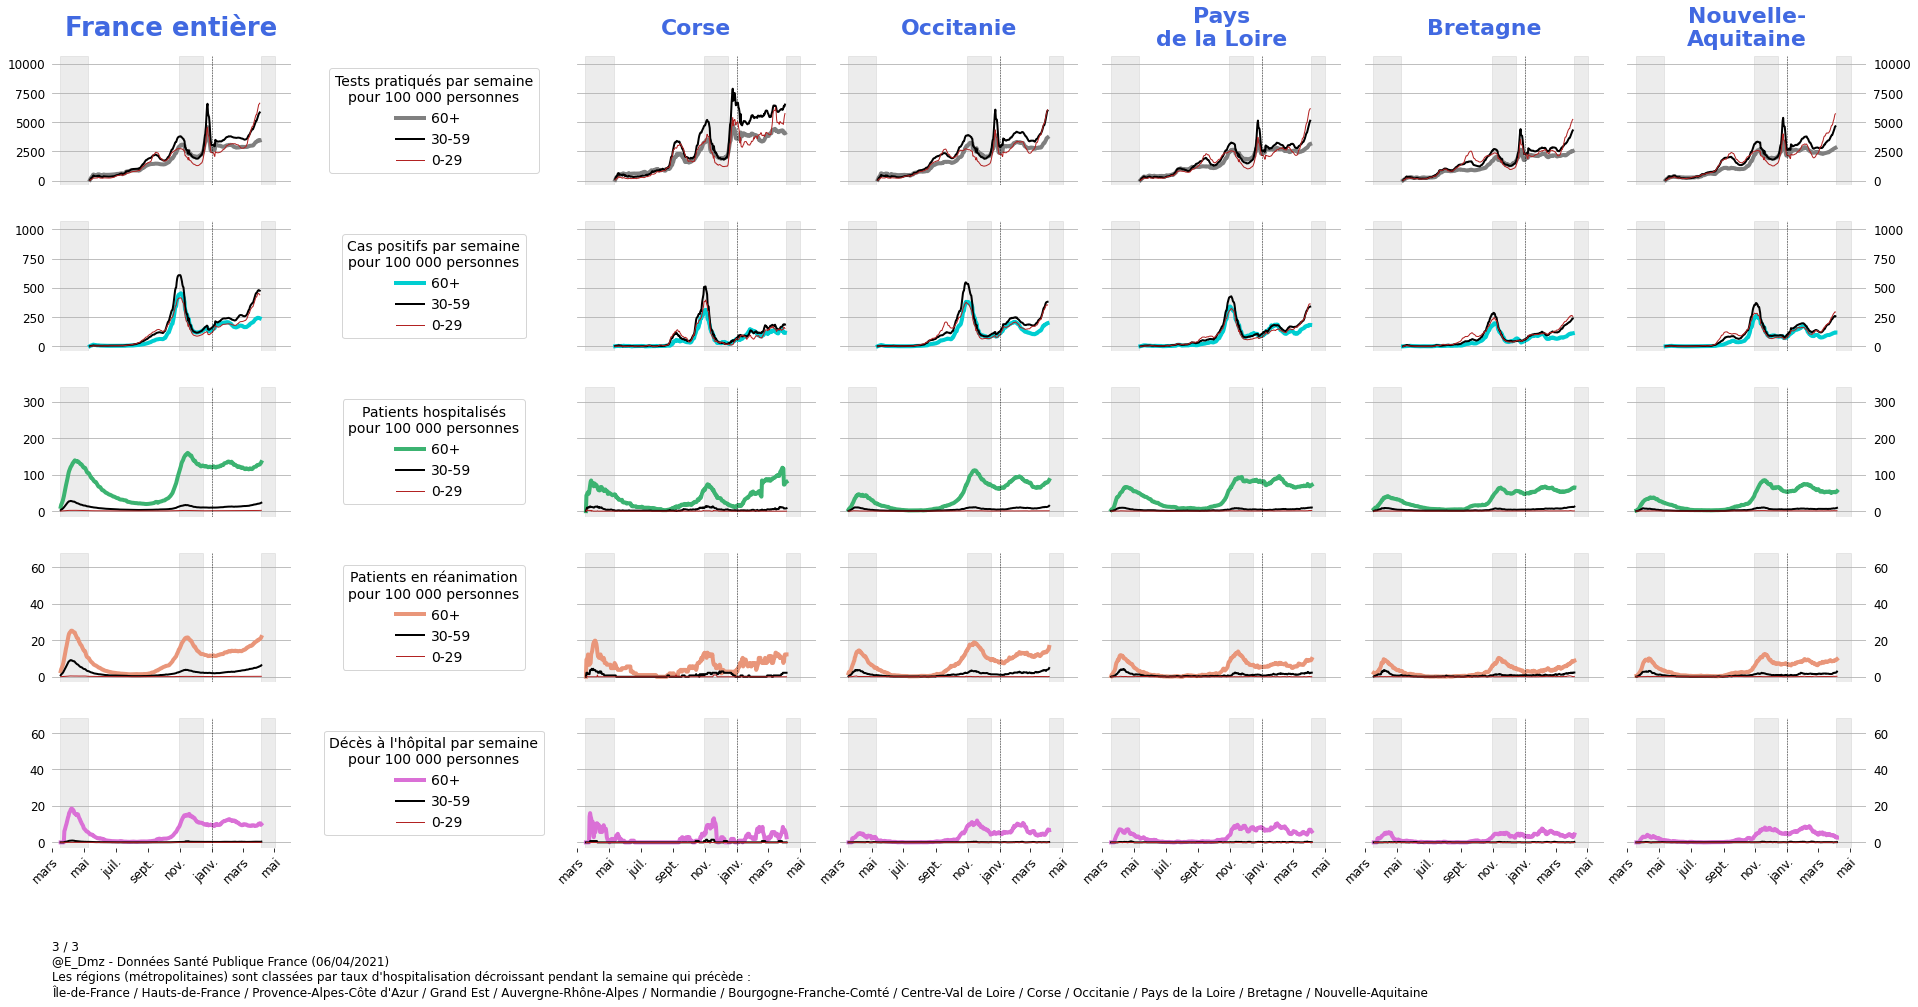

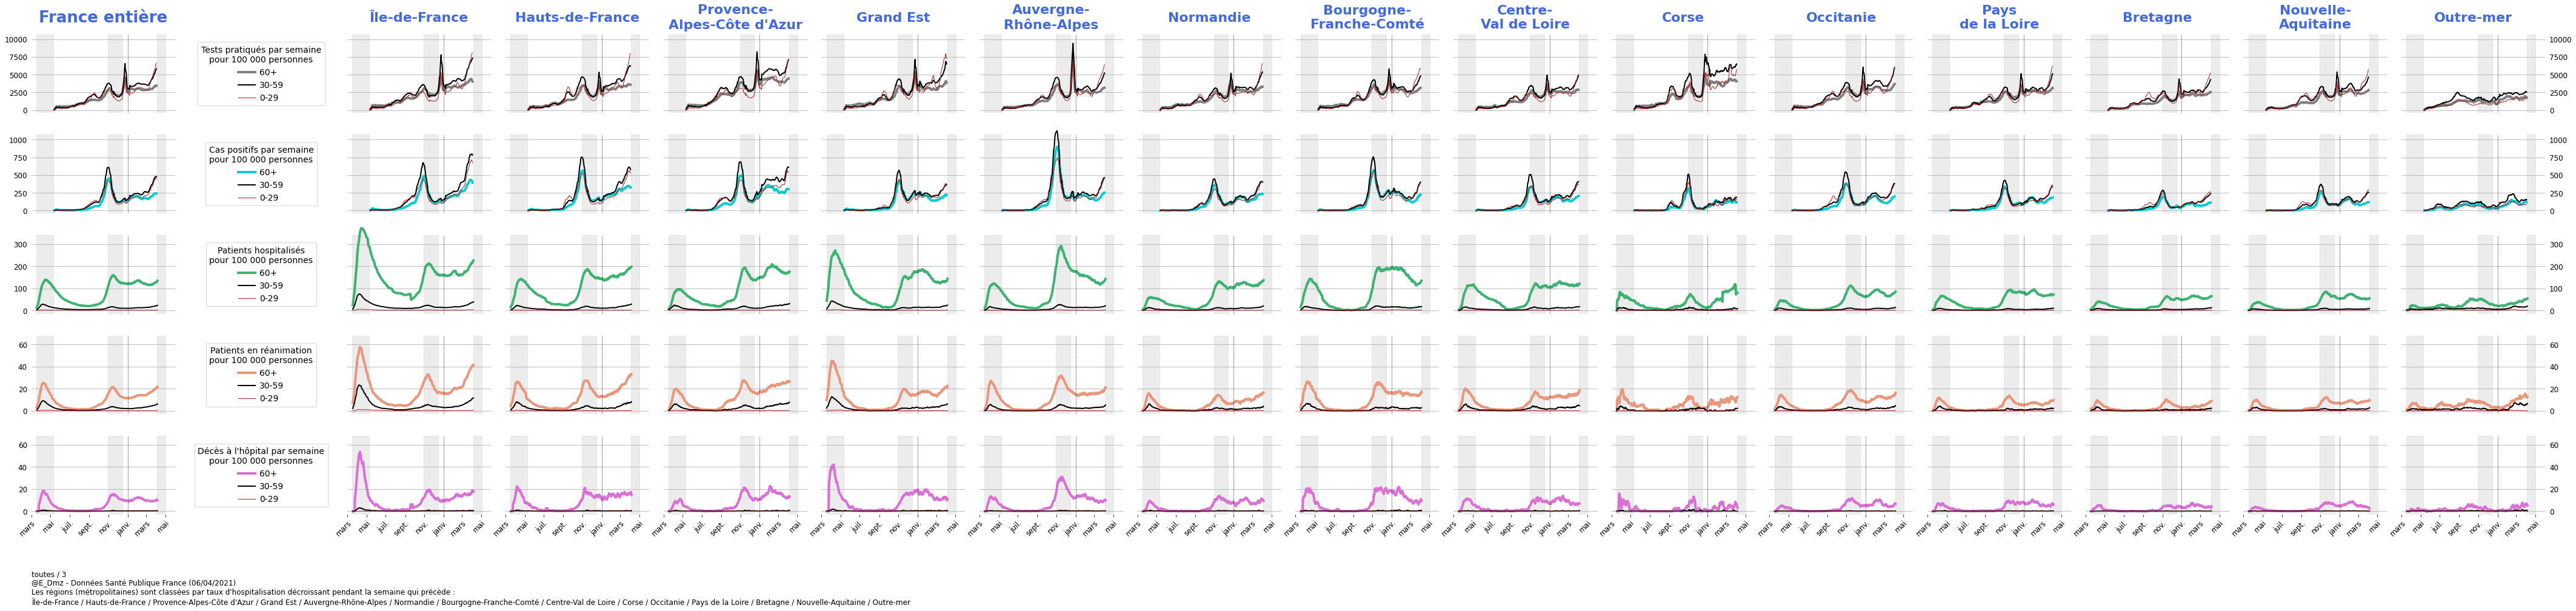

In [51]:
produce_fig_lines(d, regions_ordered[:4], regions_ordered[:-1], 1)
produce_fig_lines(d, regions_ordered[4:8], regions_ordered[:-1], 2)
produce_fig_lines(d, regions_ordered[8:-1], regions_ordered[:-1], 3)
produce_fig_lines(d, regions_ordered, regions_ordered, 'toutes')

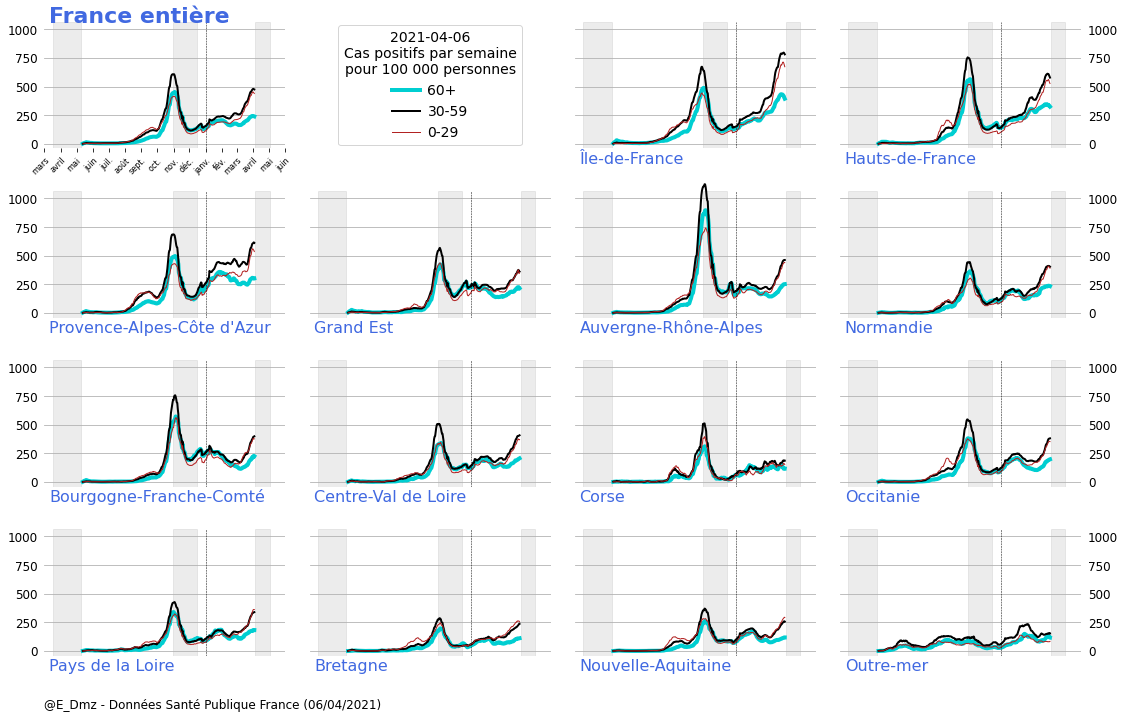

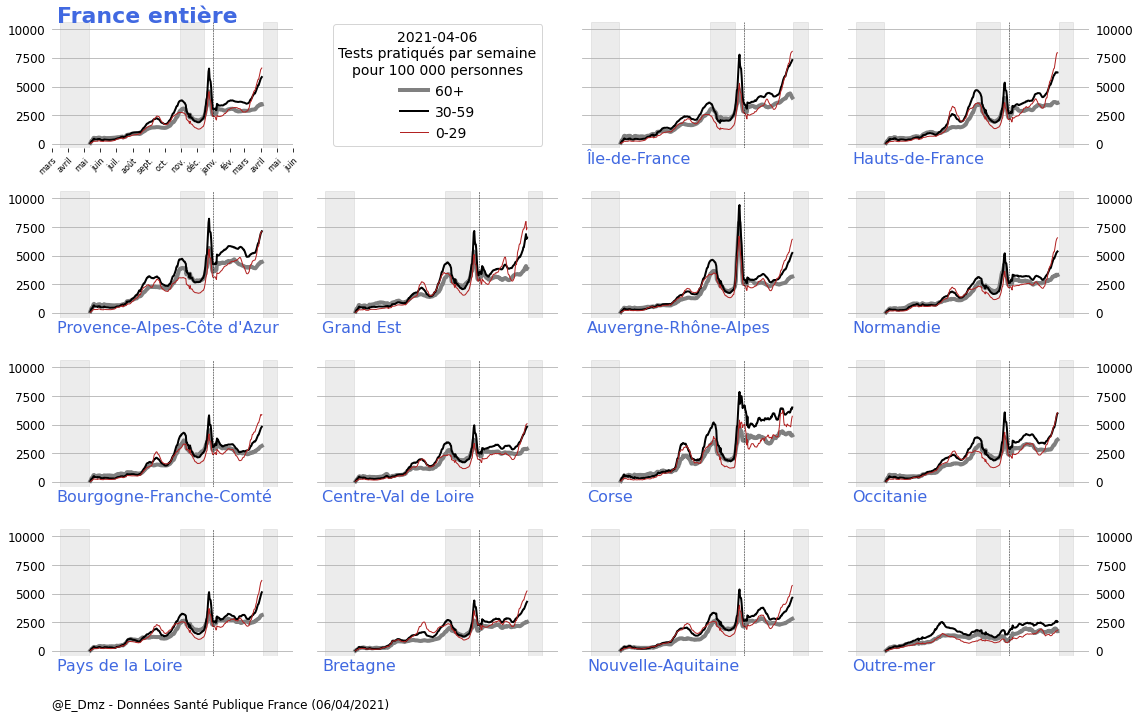

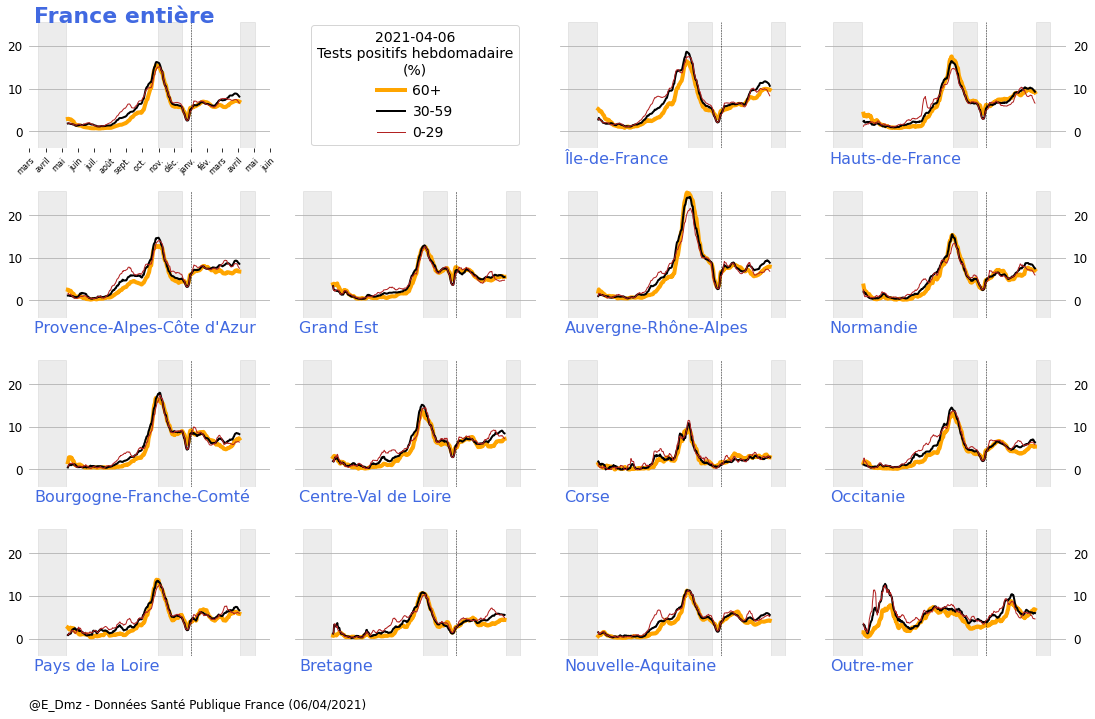

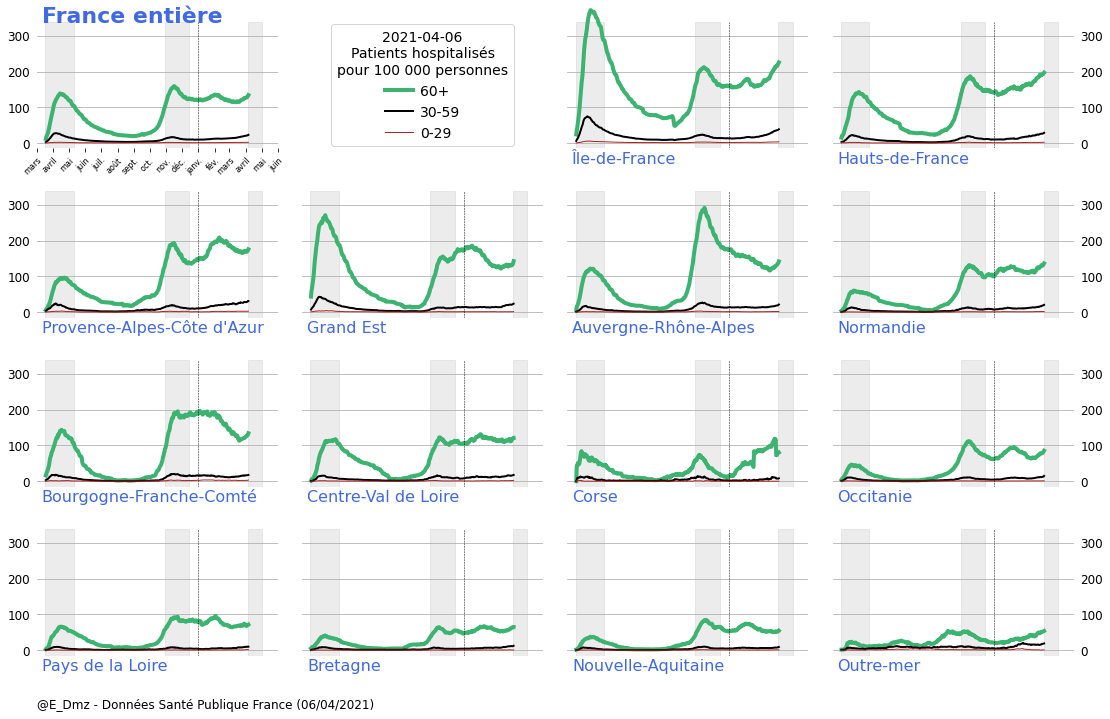

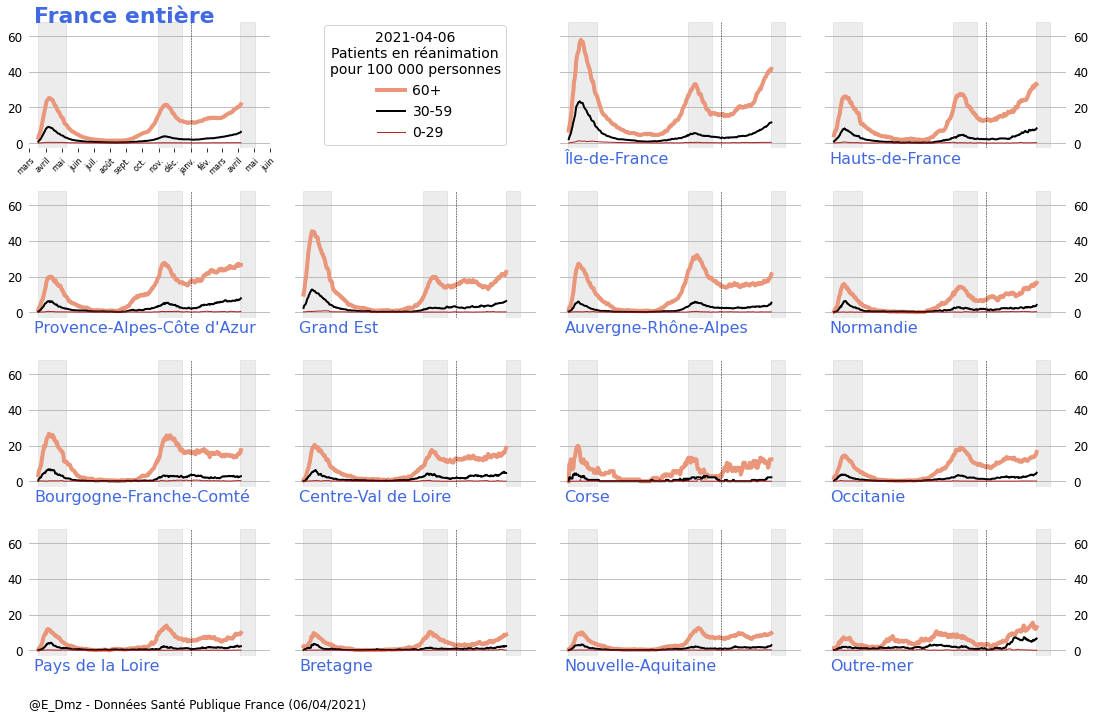

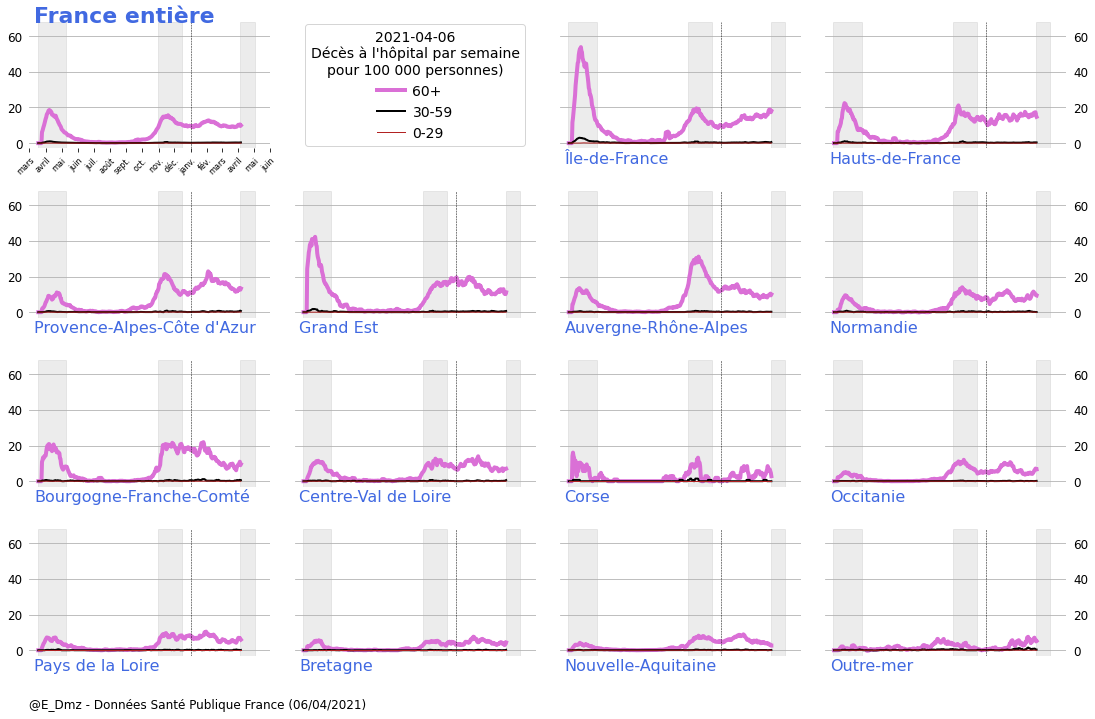

In [5]:
produce_fig(ymin = -40,
    ymax = 1190,
            d = d,
    column_to_plot = "incidence hebdo",
    main_color = "darkturquoise",
    title = '{}\nCas positifs par semaine\npour 100 000 personnes'.format(date_text),
    regions_ordered = regions_ordered,
    fname = fname_output_synth + '-fig-incidence',)
produce_fig(ymin = -400,
    ymax = 11900,
            d = d,
    column_to_plot = "taux de test hebdo",
    main_color = "gray",
    title = '{}\nTests pratiqués par semaine\npour 100 000 personnes'.format(date_text),
    regions_ordered = regions_ordered,
    fname = fname_output_synth + '-fig-tests',)
produce_fig(ymin = -4,
    ymax = 29,
            d = d,
    column_to_plot = "positivite hebdo",
    main_color = "orange",
    title = '{}\nTests positifs hebdomadaire\n(%)'.format(date_text),
    regions_ordered = regions_ordered,
    fname = fname_output_synth + '-fig-positifs',)
produce_fig(ymin = -15,
    ymax = 379,
            d = d,
    column_to_plot = "taux hosp",
    main_color = "mediumseagreen",
    title = '{}\nPatients hospitalisés\npour 100 000 personnes'.format(date_text),
    regions_ordered = regions_ordered,
    fname = fname_output_synth + '-fig-hosp',)
produce_fig(ymin = -3,
    ymax = 76,
            d = d,
    column_to_plot = "taux rea",
    main_color = "darksalmon",
    title = '{}\nPatients en réanimation\npour 100 000 personnes'.format(date_text),
    regions_ordered = regions_ordered,
    fname = fname_output_synth +  '-fig-rea',)
produce_fig(ymin = -3,
    ymax = 76,
            d = d,
    column_to_plot = "taux décès",
    main_color = "orchid",
    title = '{}\nDécès à l\'hôpital par semaine\npour 100 000 personnes)'.format(date_text),
    regions_ordered = regions_ordered,
    fname = fname_output_synth +  '-fig-deces',)

In [6]:
fname = fname_temp_vac + '-tot-3C.csv'
d2 = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'entity': str})
d2.sample(3)

entity three_class       jour  n_dose1  n_dose2  n_cum_dose1  \
21623     54       whole 2021-01-01        0        0           10   
38270     95         60+ 2021-03-04     2278     1028        33124   
28919     72       whole 2021-01-25      501        5         9123   

       n_cum_dose2   taux dose 1  taux dose 2  
21623            0      1.369117     0.000000  
38270        18540  13729.700155  7684.719263  
28919           10   1628.447040     1.784991

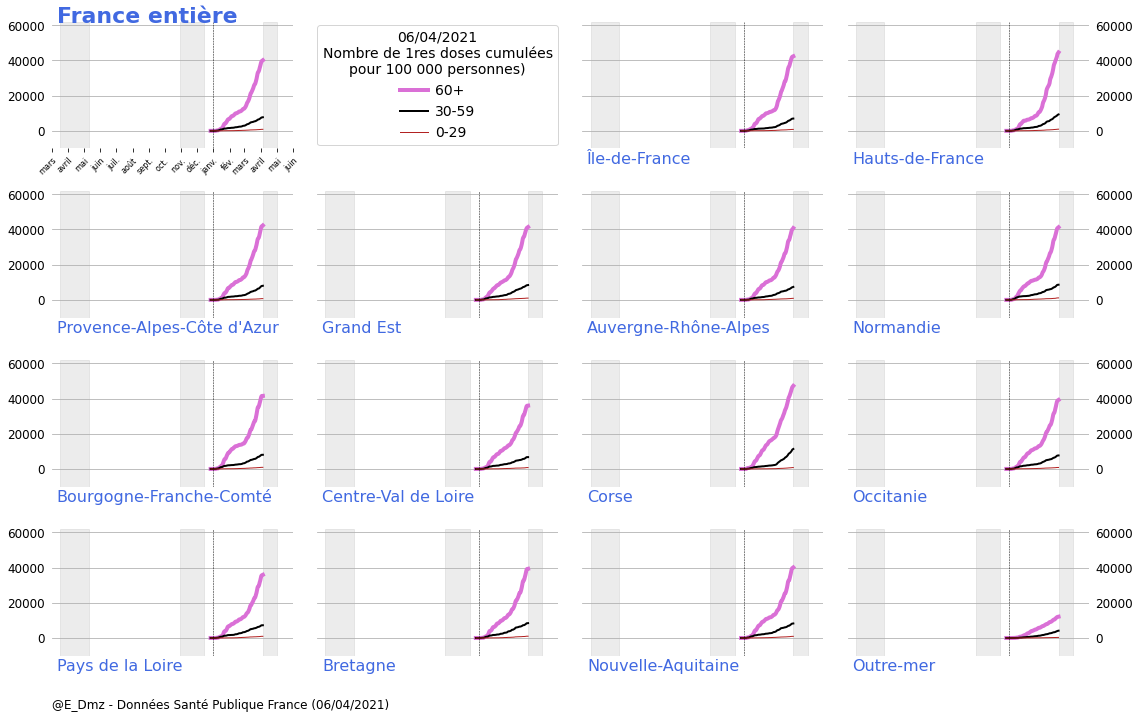

In [12]:
produce_fig(ymin = -10000,
    ymax = 70000,
            d = d2,
    column_to_plot = "taux dose 1",
    main_color = "orchid",
    title = '{}\nNombre de 1res doses cumulées\npour 100 000 personnes)'.format(date_text),
    regions_ordered = regions_ordered,
    fname = fname_output_synth +  '-fig-vac1',)

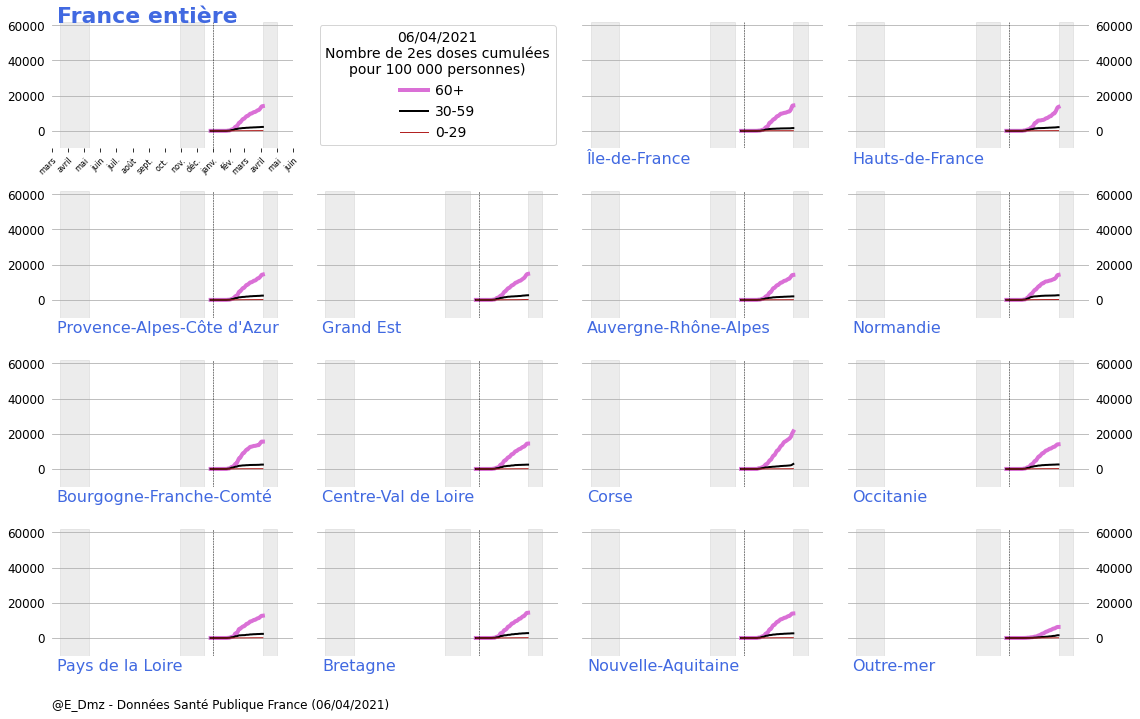

In [13]:
produce_fig(ymin = -10000,
    ymax = 70000,
            d = d2,
    column_to_plot = "taux dose 2",
    main_color = "orchid",
    title = '{}\nNombre de 2es doses cumulées\npour 100 000 personnes)'.format(date_text),
    regions_ordered = regions_ordered,
    fname = fname_output_synth +  '-fig-vac2',)

In [ ]:
fig, axs = plt.subplots(11, 10, figsize = (15,20))
axs = axs.ravel()
for ax in axs:
    ax.set_axis_off()
for i, dep in enumerate(deps):
    sns.set_palette("mako",2)
    
    dplot = d.loc[d.dep == dep].loc[d.cl_age90 == 19]
    axs[i].plot(dplot.jour, dplot["incidence hebdo"], c = "darkturquoise", linewidth = 4)
    
    dplot = d.loc[d.dep == dep].loc[d.cl_age90 == 0]
    axs[i].plot(dplot.jour, dplot["incidence hebdo"], c = "black")
    
    dplot = d.loc[d.dep == dep].loc[d.cl_age90 == 89]
    #axs[i].plot(dplot.jour, dplot["incidence hebdo"], c = 'blue')
    axs[i].set_ylim(-500,1500)
    axs[i].set_axis_off()
    axs[i].set_title(dep, loc = 'left', y = 0.7, fontsize = 22, c = "darkturquoise")
    axs[i].set_title(dep_name[dep], x = -0.05, y = 0.2, rotation = 90, fontsize = 7)
fig.savefig("fig2.svg", pad_inches = 0)

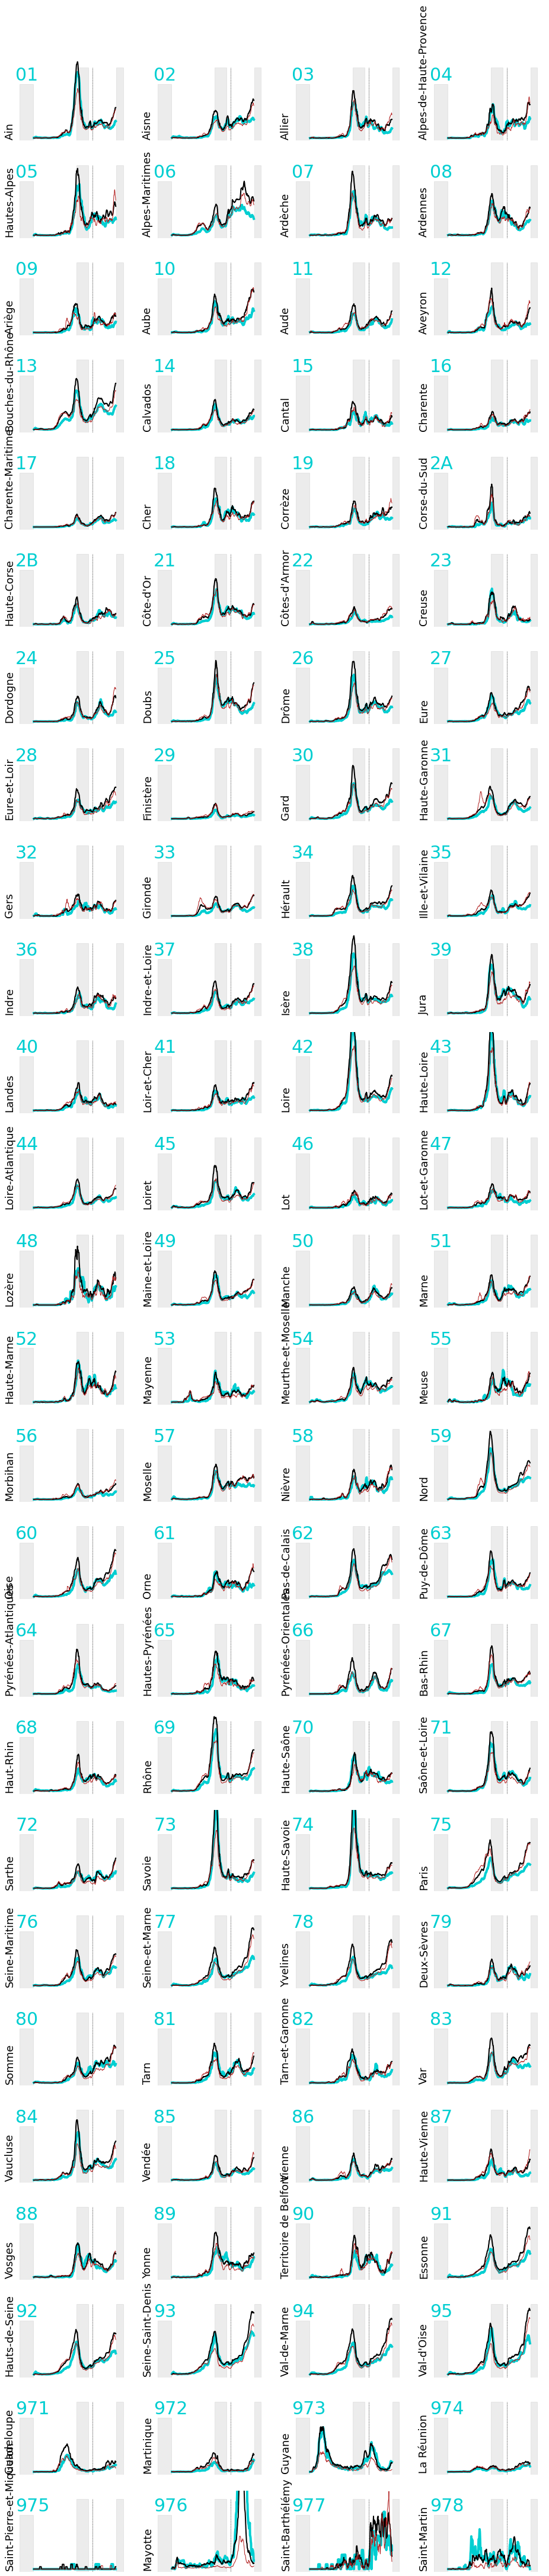

In [4]:
produce_fig_dep(d, deps)

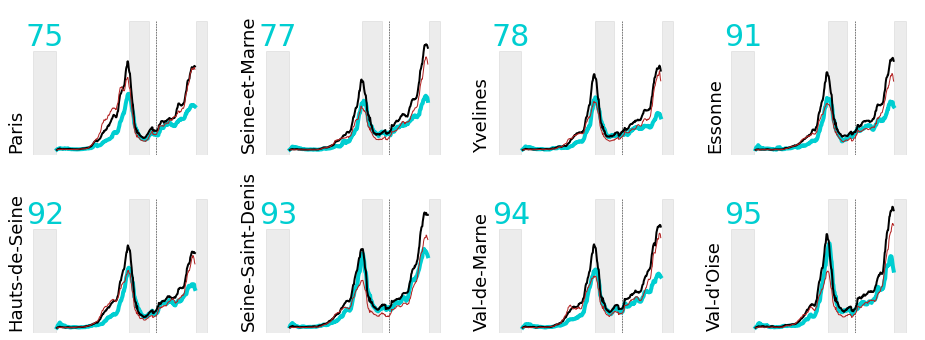

In [5]:
produce_fig_dep(d, reg2dep['Île-de-France'])

Auvergne-Rhône-Alpes
Bourgogne-Franche-Comté
Bretagne
Centre-Val de Loire
Corse
Grand Est
Hauts-de-France
Île-de-France
Normandie
Nouvelle-Aquitaine
Occitanie
Pays de la Loire
Provence-Alpes-Côte d'Azur
Outre-mer


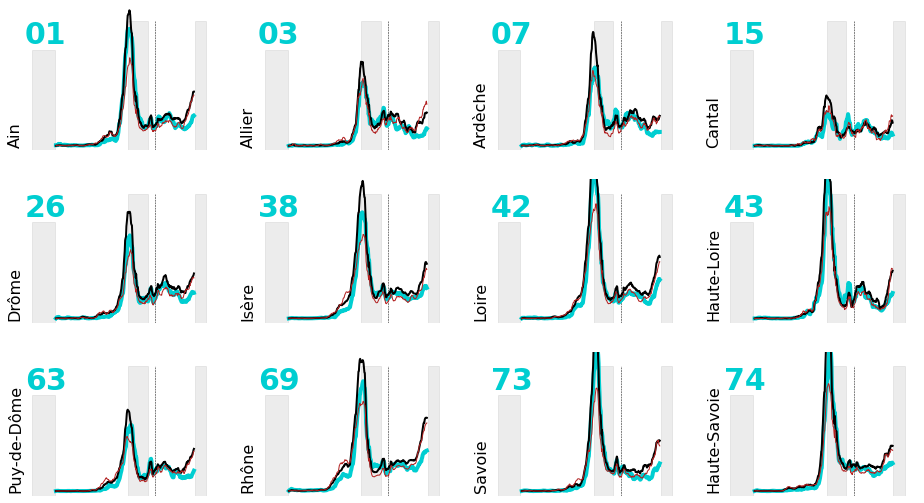

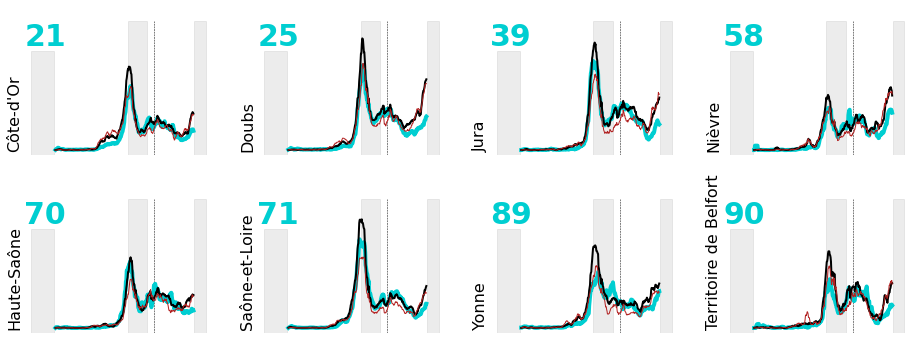

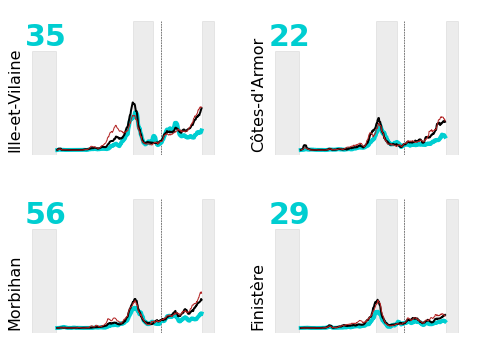

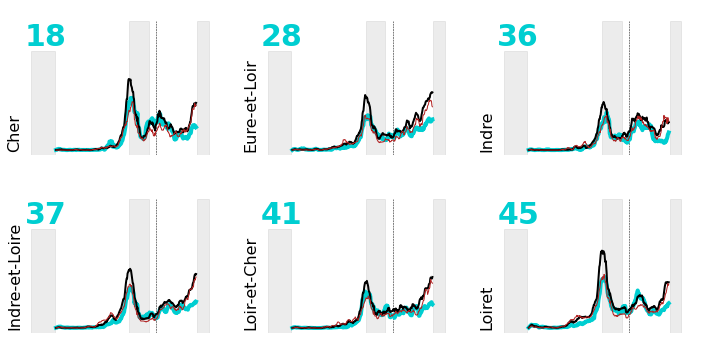

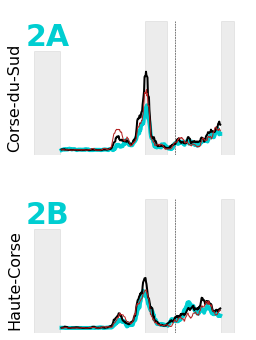

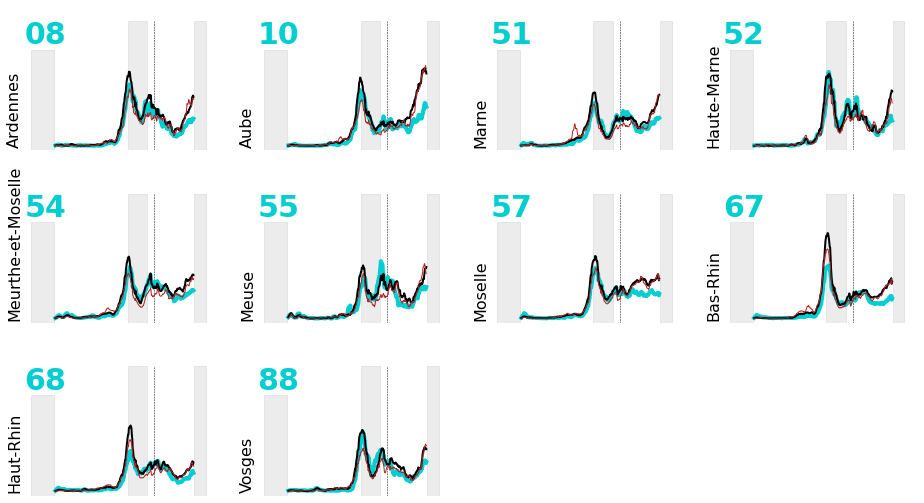

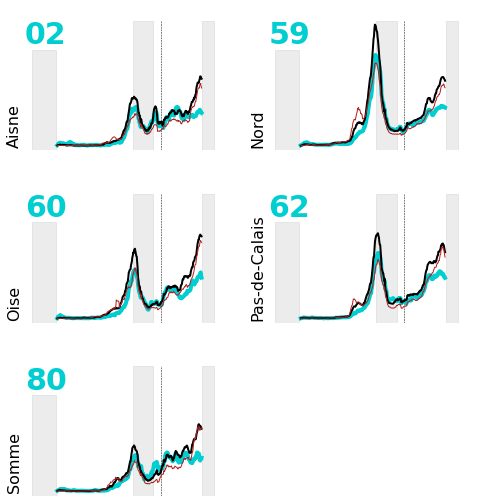

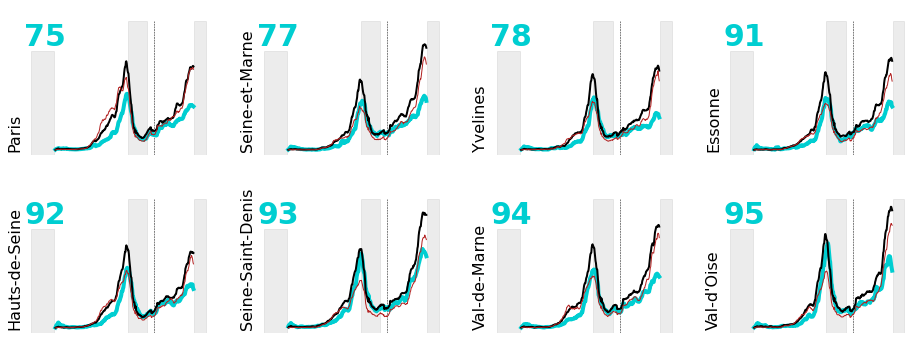

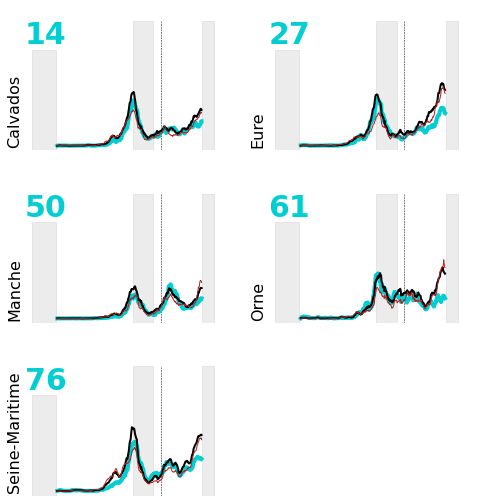

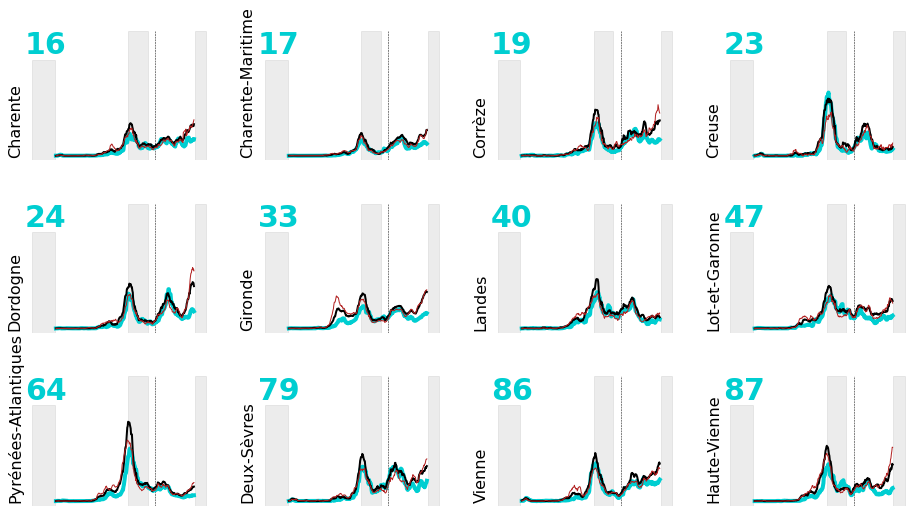

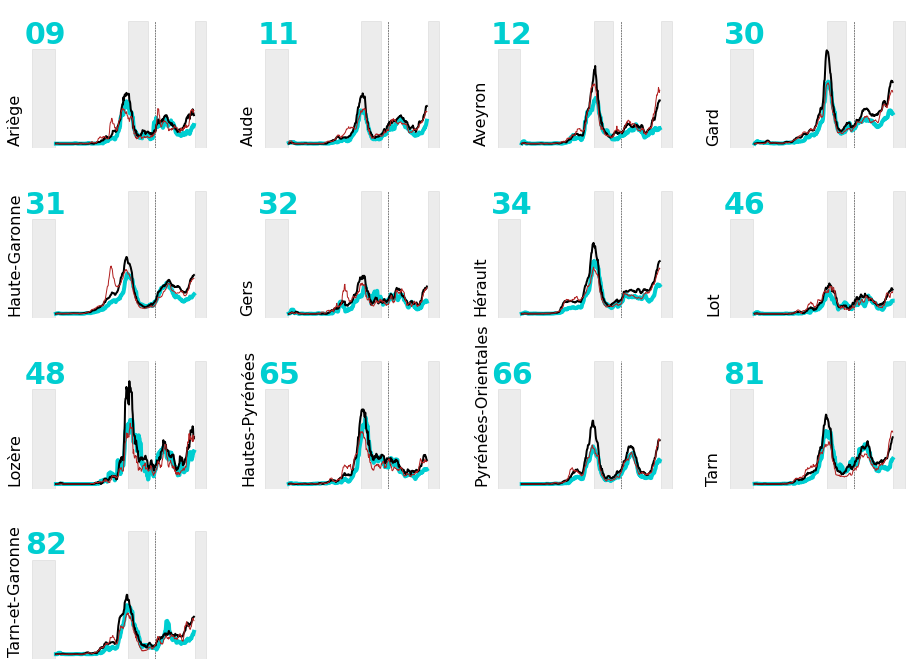

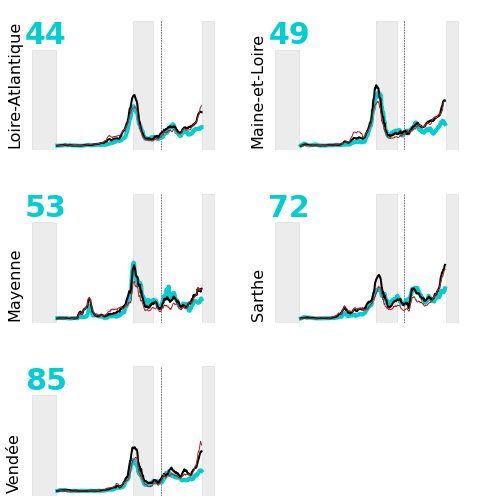

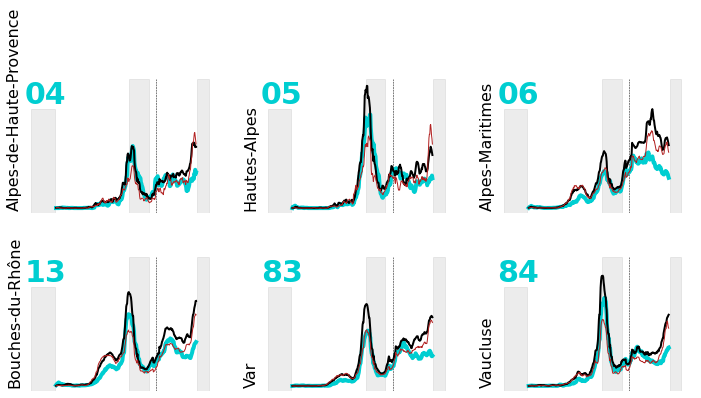

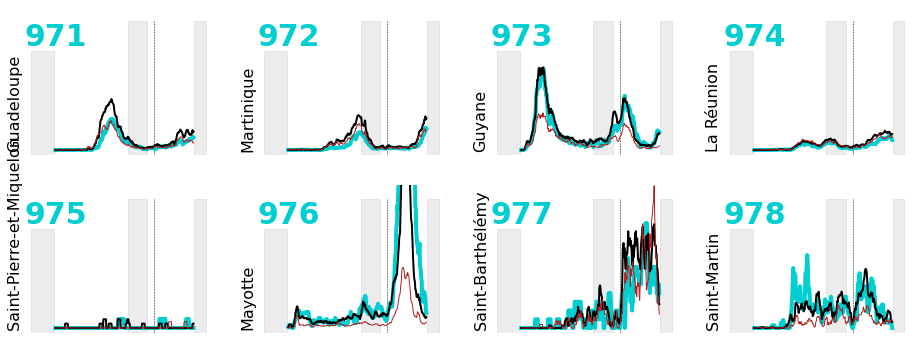

In [4]:
for reg in regs:
    print(reg)
    produce_fig_dep(d, reg2dep[reg])